In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'ALB'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-06-30,605,-397,207,79,515,407,371,1526,265,...,185,0,378,816,686,1952,146,-23,112.15,2014-08-04
1,2014-09-30,642,-437,205,79,653,383,368,1509,252,...,206,0,368,812,684,1937,135,-30,112.15,2014-11-04
2,2014-12-31,599,-436,163,-21,2490,385,358,3348,243,...,232,0,711,1140,2223,3864,62,-34,112.15,2015-02-19
3,2015-03-31,692,-501,191,40,261,627,620,1686,2710,...,341,0,472,1457,3541,6685,46,-57,112.25,2015-05-05
4,2015-06-30,718,-506,212,44,207,638,602,1654,2770,...,342,0,428,1367,3562,6592,87,-55,112.25,2015-08-04


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-06-30,2023-08-04,117.40,2370,-1812,558,125,1600,1344,3659,...,274,19110,3052,0,6,4291,3393,9294,74,-504
37,2023-09-30,2023-11-04,117.40,2311,-2256,55,-150,1602,1179,3404,...,261,18883,2607,0,162,3941,3381,8986,629,-546
38,2023-12-31,2024-02-19,117.40,2356,-3049,-693,-1040,890,1213,2161,...,262,18271,2088,0,626,3560,3437,8858,-98,-684
39,2024-03-31,2024-04-29,117.45,1360,-1321,39,-164,2055,874,1904,...,252,19032,1295,0,5,2050,3519,7233,98,-579
40,2024-06-30,2024-07-29,117.70,1430,-1440,-10,-176,1830,785,1800,...,243,18388,1313,0,3,1958,3519,8166,362,-447


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-06-30,2023-08-04,117.40,2370,-1812,558,125,1600,1344,3659,...,19110,3052,0,6,4291,3393,9294,74,-504,1
37,2023-09-30,2023-11-04,117.40,2311,-2256,55,-150,1602,1179,3404,...,18883,2607,0,162,3941,3381,8986,629,-546,1
38,2023-12-31,2024-02-19,117.40,2356,-3049,-693,-1040,890,1213,2161,...,18271,2088,0,626,3560,3437,8858,-98,-684,1
39,2024-03-31,2024-04-29,117.45,1360,-1321,39,-164,2055,874,1904,...,19032,1295,0,5,2050,3519,7233,98,-579,1
40,2024-06-30,2024-07-29,117.70,1430,-1440,-10,-176,1830,785,1800,...,18388,1313,0,3,1958,3519,8166,362,-447,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-06-30,2023-08-04,117.40,2370.0,-1812.0,558.0,125.0,1600.0,1344.0,3659.0,...,19110.0,3052.0,0.0,6.0,4291.0,3393.0,9294.0,74.0,-504.0,1
37,2023-09-30,2023-11-04,117.40,2311.0,-2256.0,55.0,-150.0,1602.0,1179.0,3404.0,...,18883.0,2607.0,0.0,162.0,3941.0,3381.0,8986.0,629.0,-546.0,1
38,2023-12-31,2024-02-19,117.40,2356.0,-3049.0,-693.0,-1040.0,890.0,1213.0,2161.0,...,18271.0,2088.0,0.0,626.0,3560.0,3437.0,8858.0,-98.0,-684.0,1
39,2024-03-31,2024-04-29,117.45,1360.0,-1321.0,39.0,-164.0,2055.0,874.0,1904.0,...,19032.0,1295.0,0.0,5.0,2050.0,3519.0,7233.0,98.0,-579.0,1
40,2024-06-30,2024-07-29,117.70,1430.0,-1440.0,-10.0,-176.0,1830.0,785.0,1800.0,...,18388.0,1313.0,0.0,3.0,1958.0,3519.0,8166.0,362.0,-447.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-08-04,52.704411,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.435022,0.564978,0.0,0.0,0.0,0.0,0.342149,0.130579,0.0,0.0
1,2014-08-11,52.912052,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.435022,0.564978,0.0,0.0,0.0,0.0,0.342149,0.130579,0.0,0.0
2,2014-08-18,53.474384,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.435022,0.564978,0.0,0.0,0.0,0.0,0.342149,0.130579,0.0,0.0
3,2014-08-25,55.005692,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.435022,0.564978,0.0,0.0,0.0,0.0,0.342149,0.130579,0.0,0.0
4,2014-09-01,55.126808,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.435022,0.564978,0.0,0.0,0.0,0.0,0.342149,0.130579,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-08-04,52.704411,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.0,0.342149,0.130579,0.0,0.0,inf,3.932668,inf,inf,inf
1,2014-08-11,52.912052,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.0,0.342149,0.130579,0.0,0.0,inf,3.948161,inf,inf,inf
2,2014-08-18,53.474384,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.0,0.342149,0.130579,0.0,0.0,inf,3.990121,inf,inf,inf
3,2014-08-25,55.005692,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.0,0.342149,0.130579,0.0,0.0,inf,4.104383,inf,inf,inf
4,2014-09-01,55.126808,2014-06-30,605.0,0.0,13.401694,112.15,0.0,0.0,515.0,...,0.0,0.342149,0.130579,0.0,0.0,inf,4.113421,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

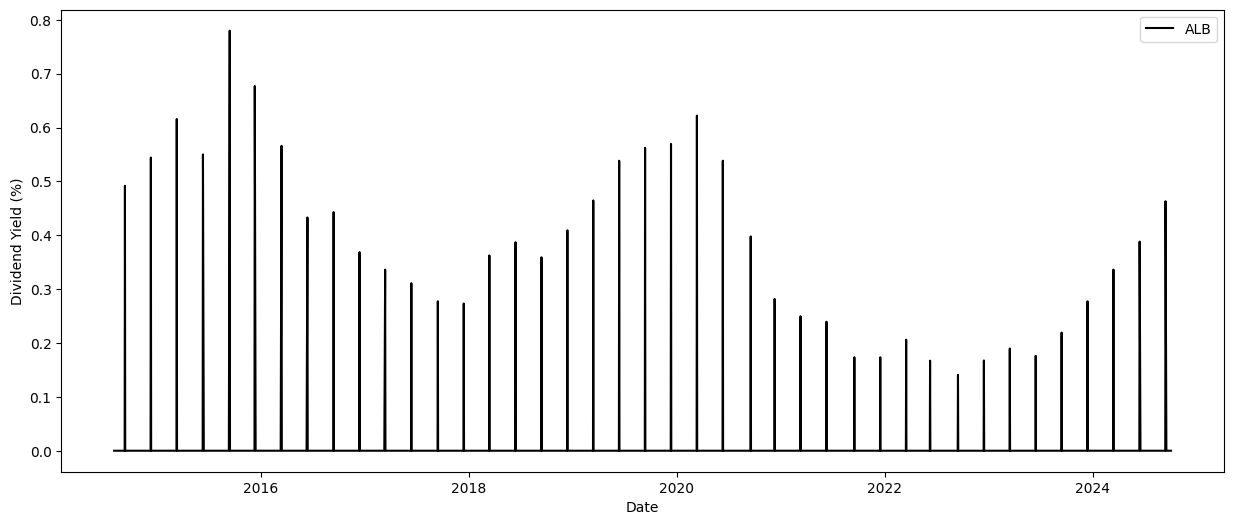

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


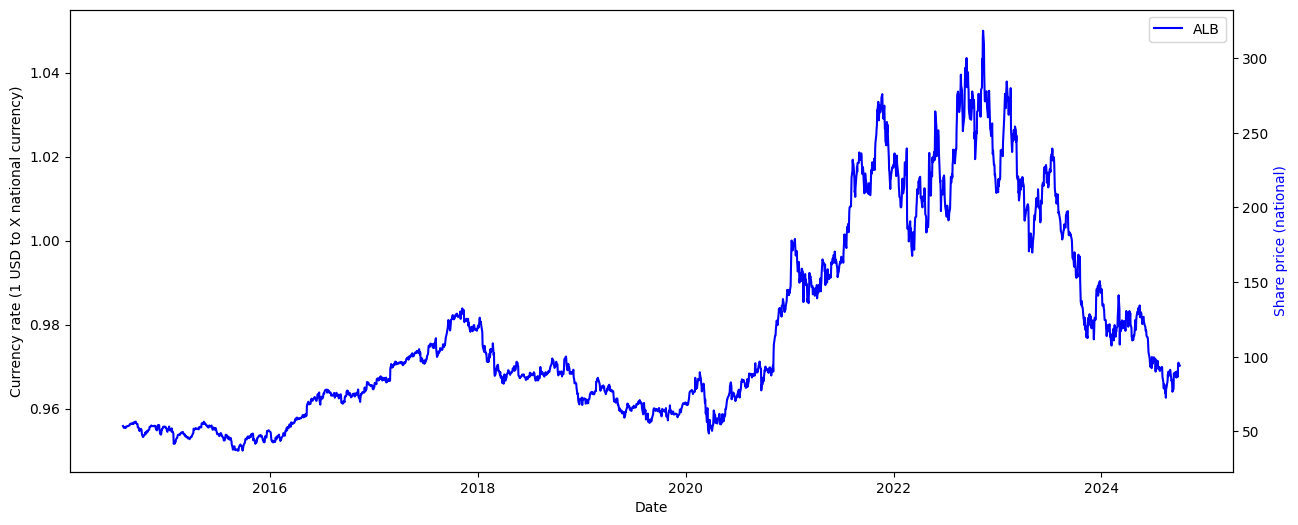

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

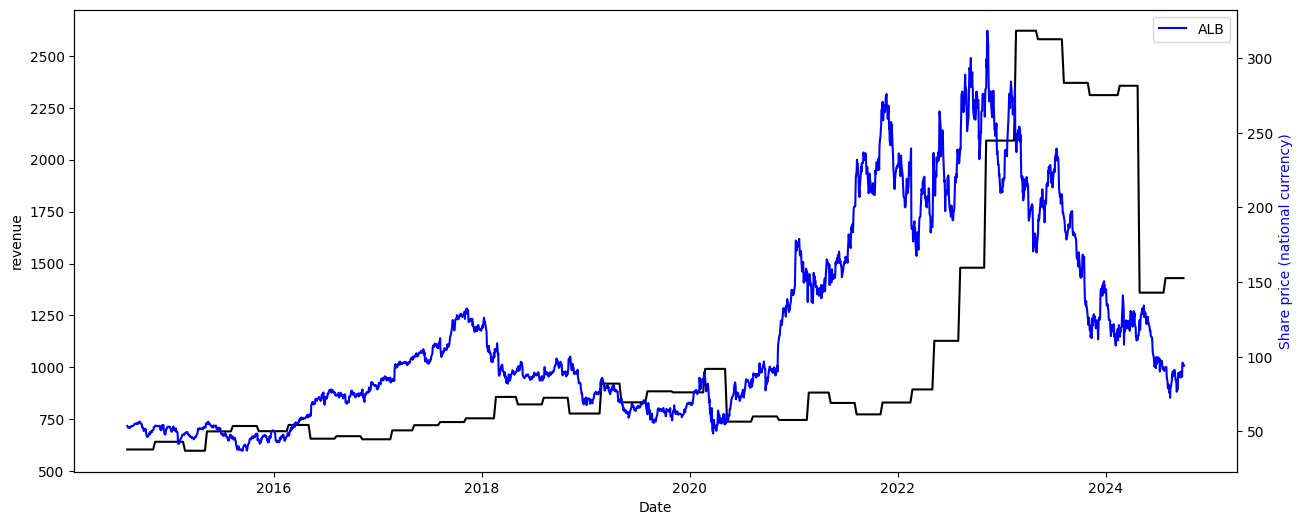

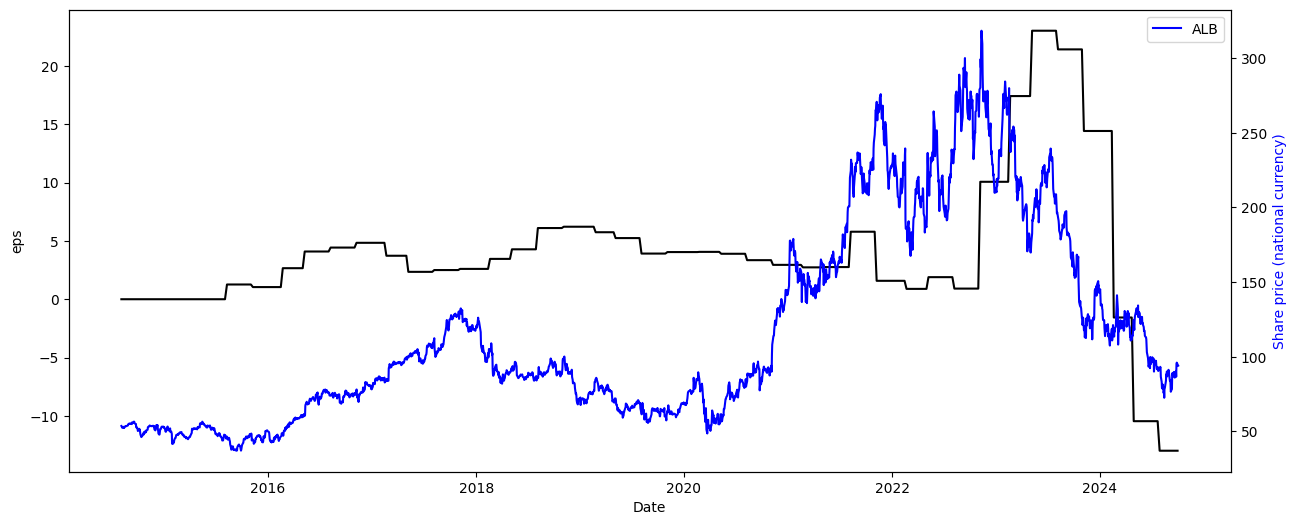

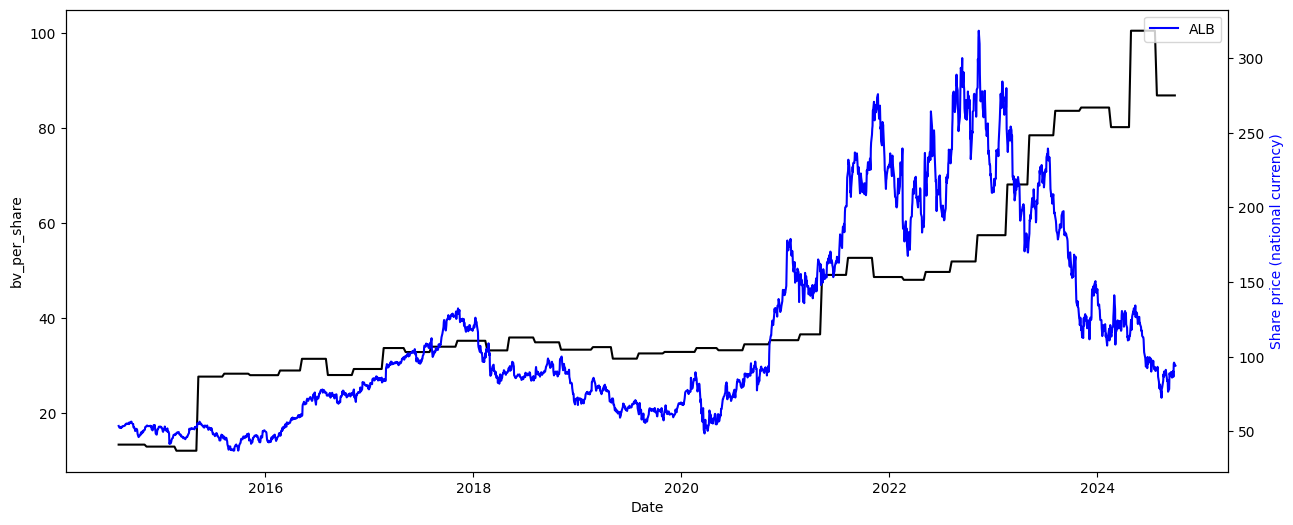

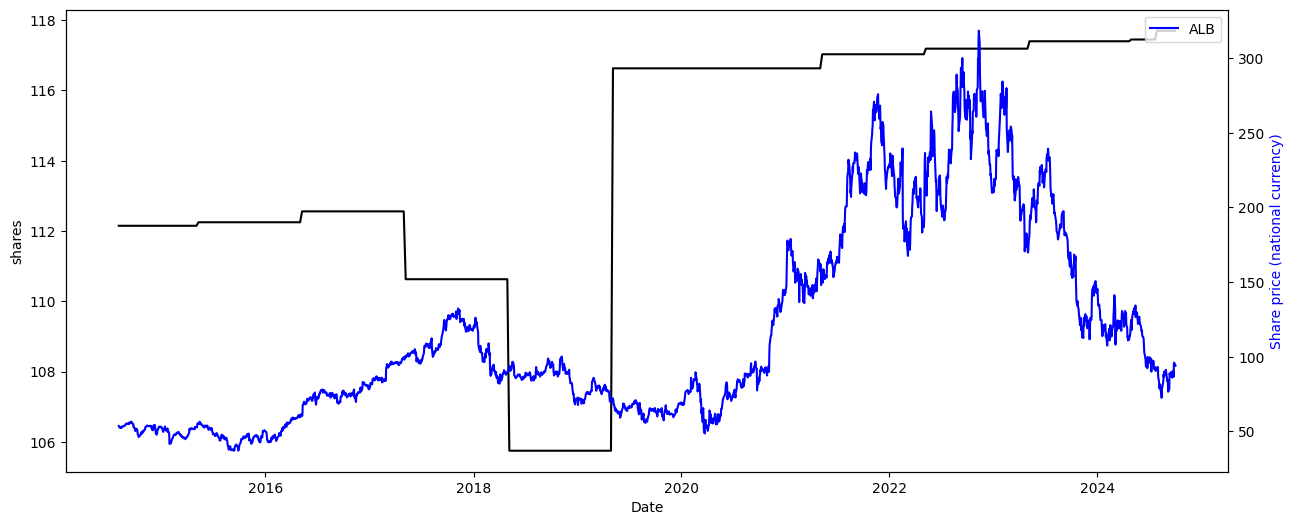

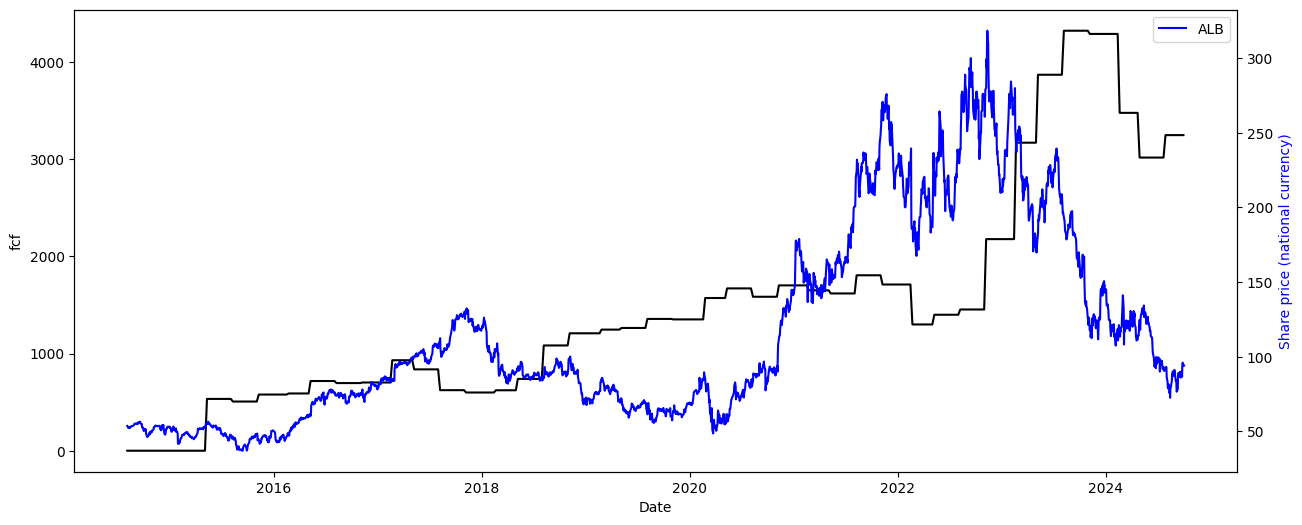

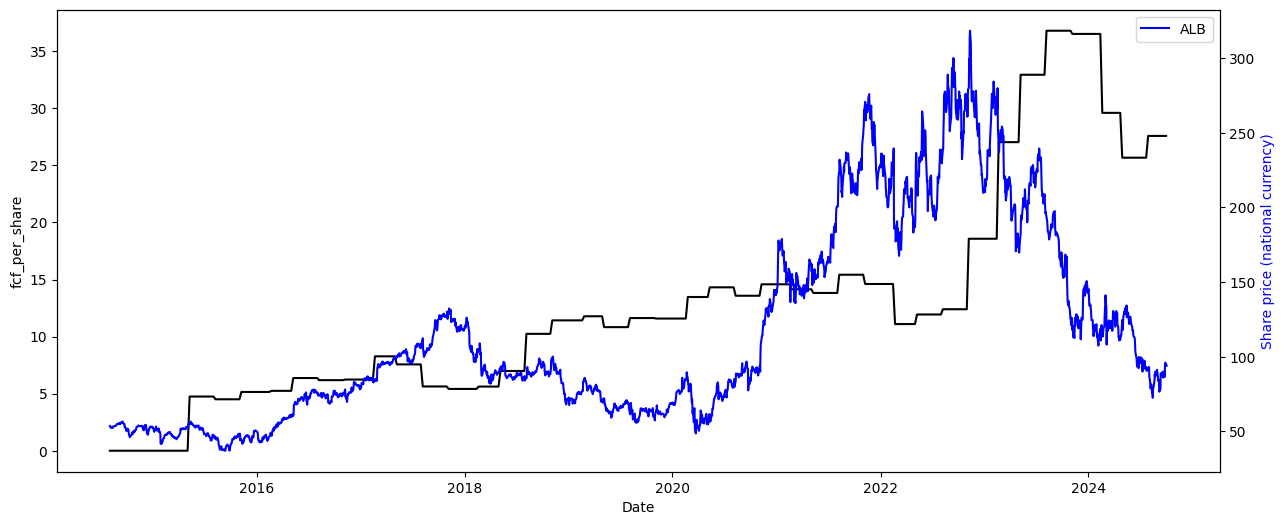

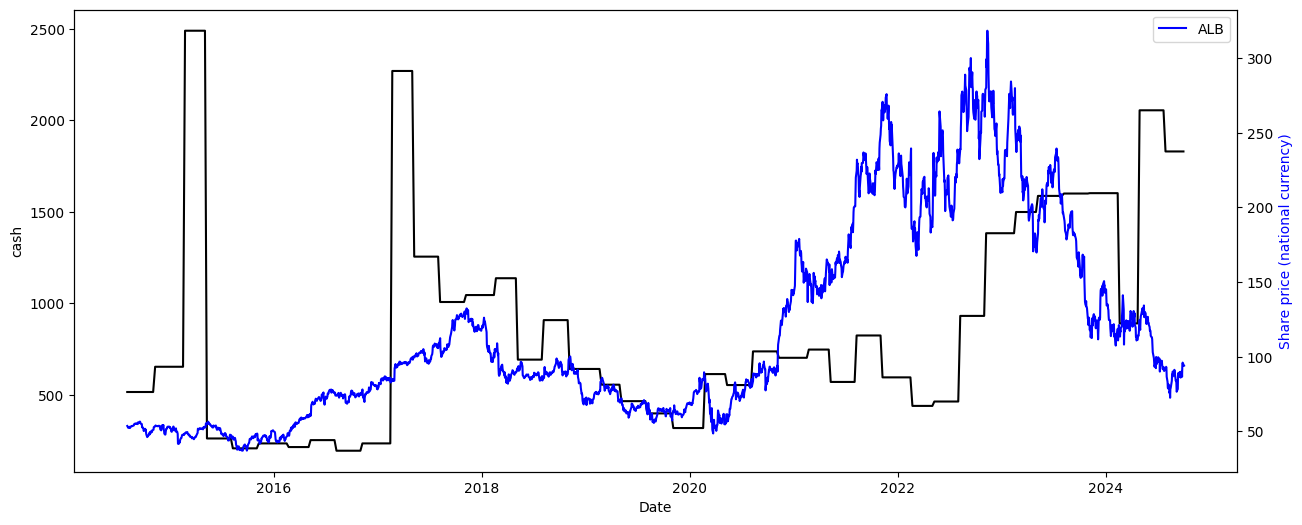

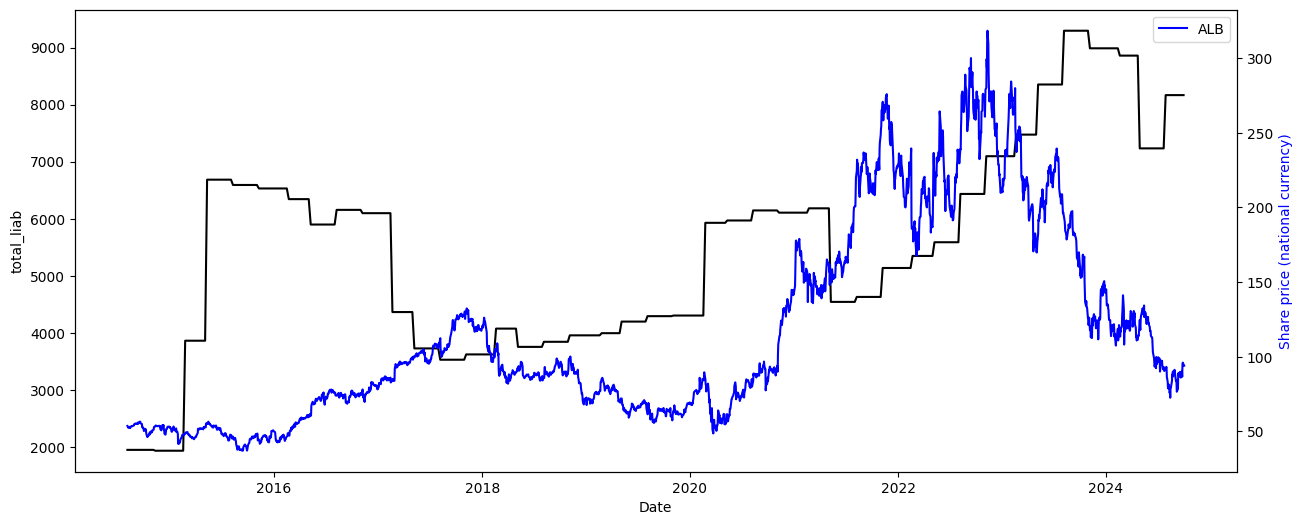

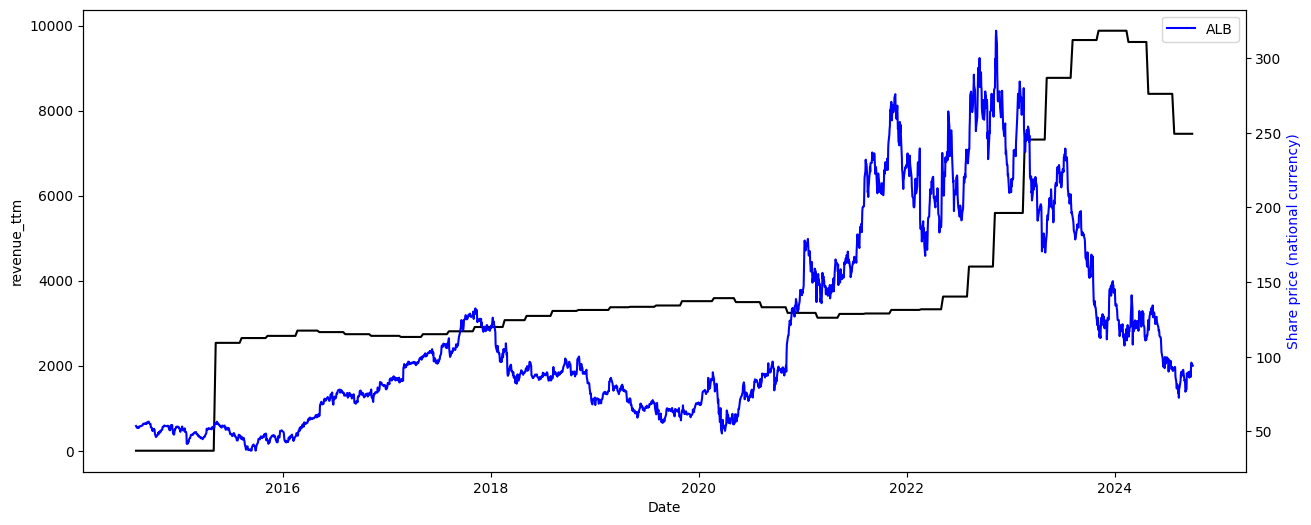

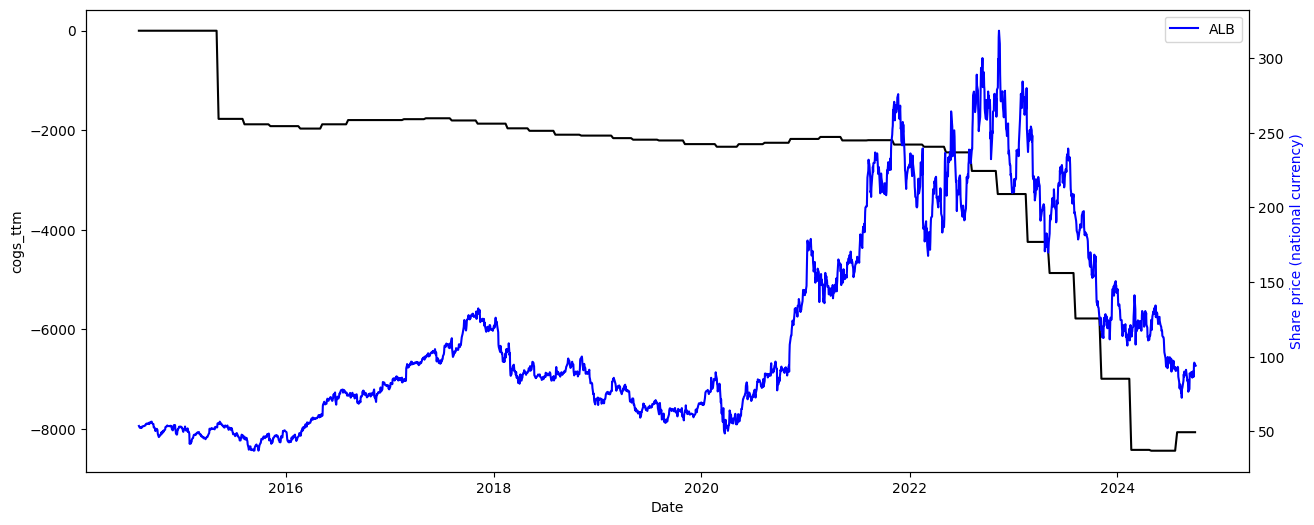

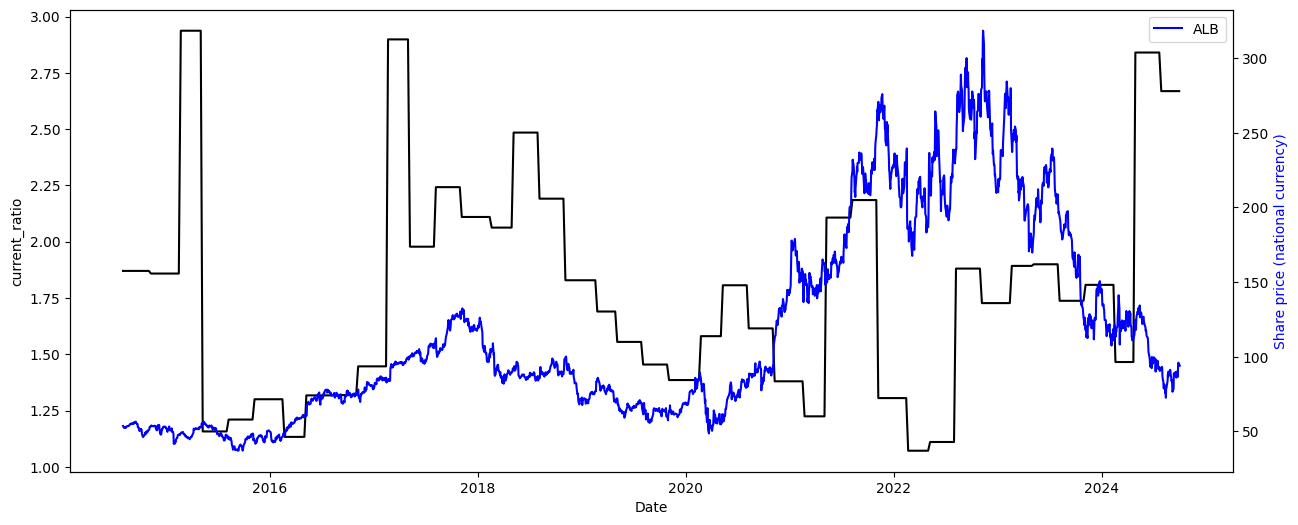

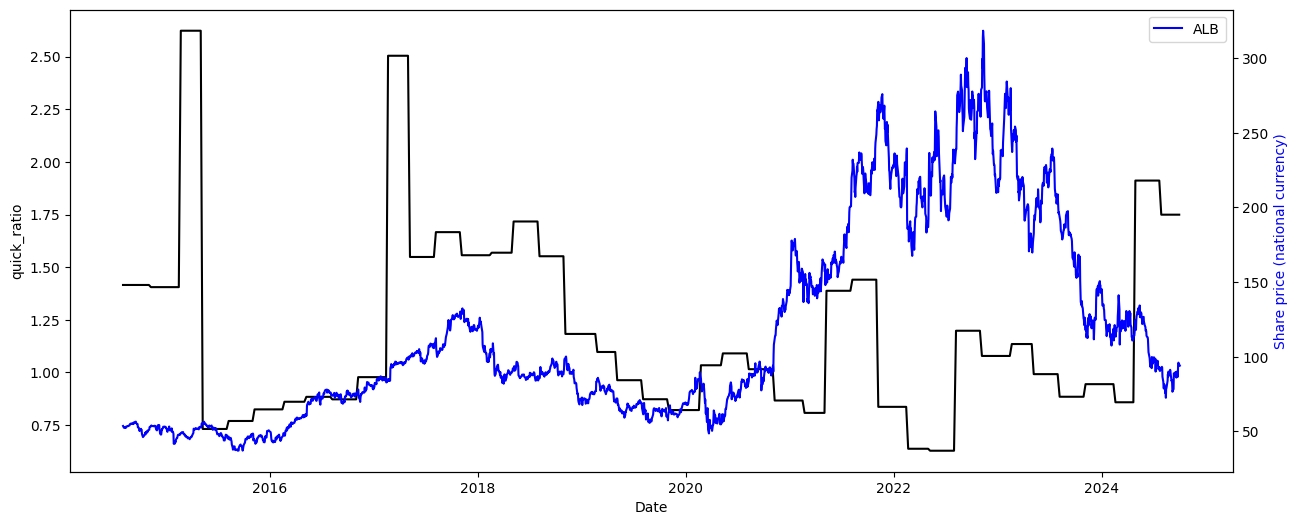

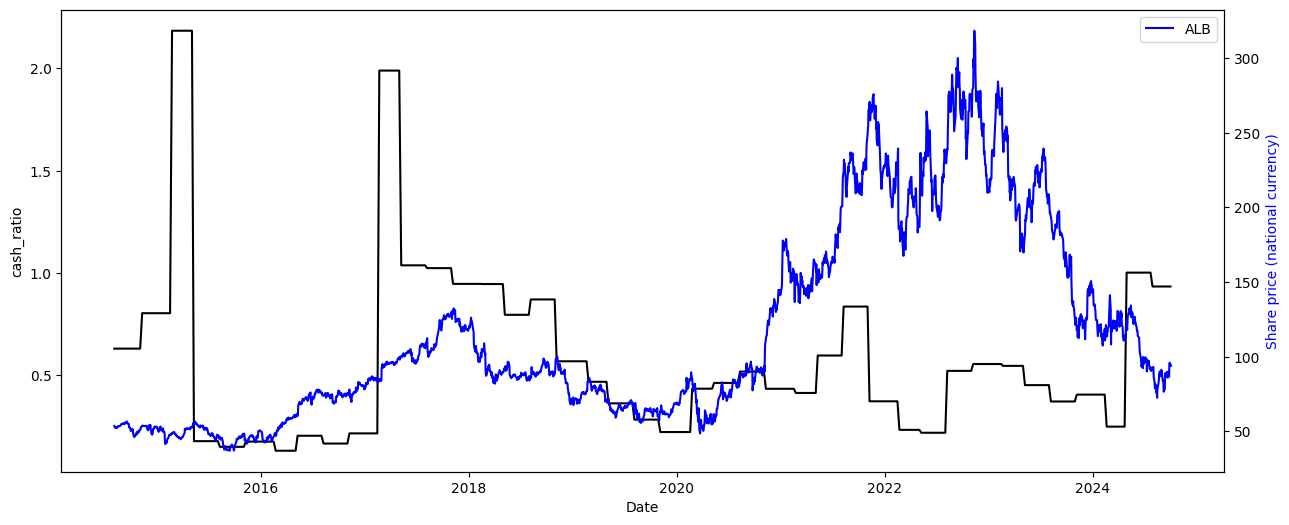

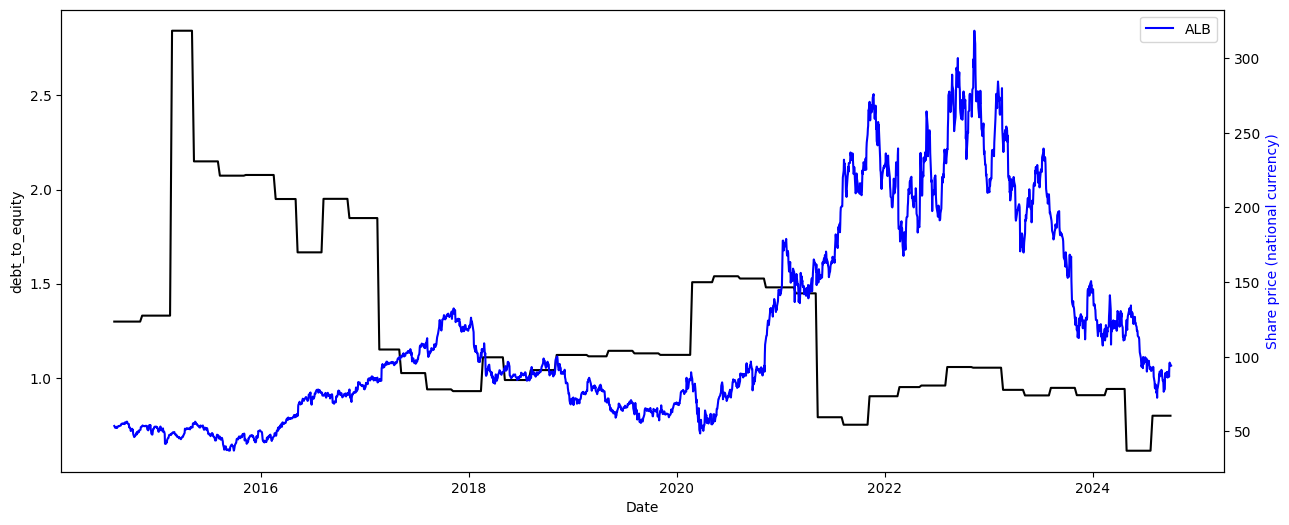

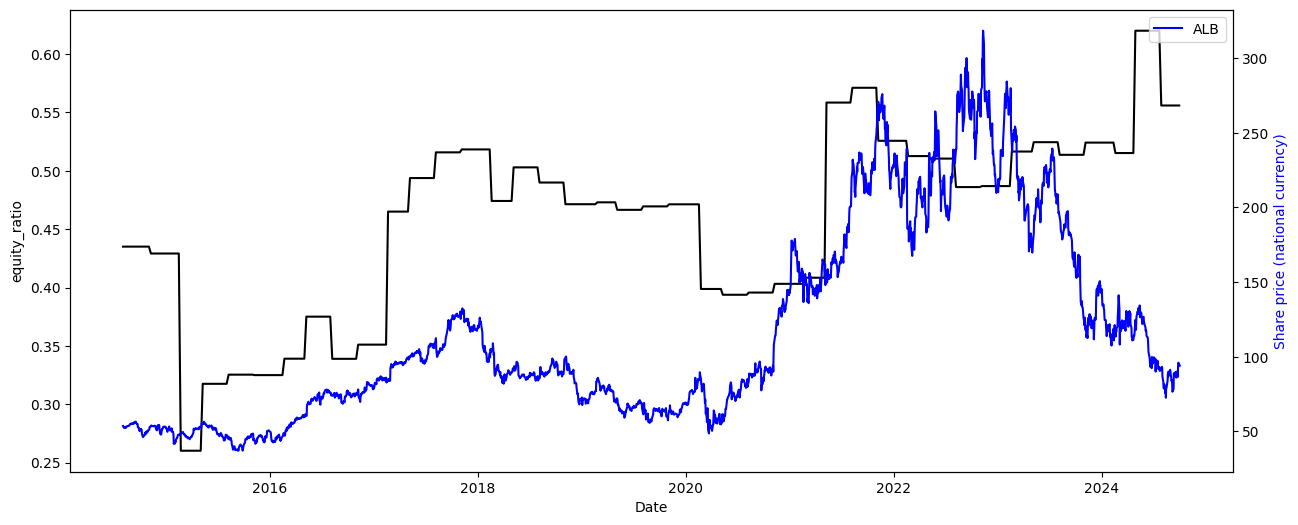

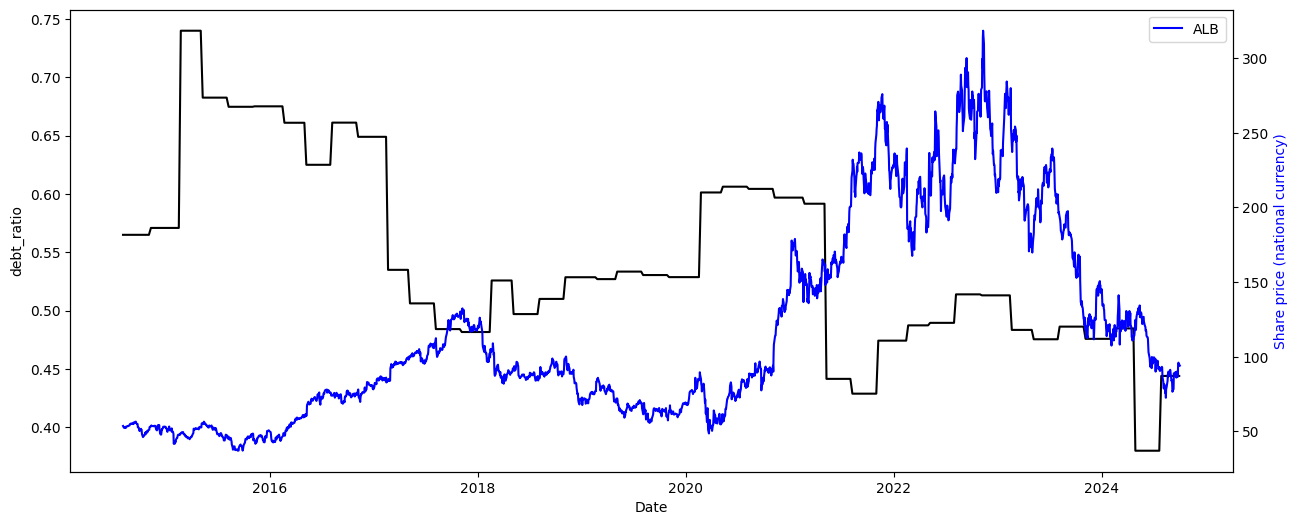

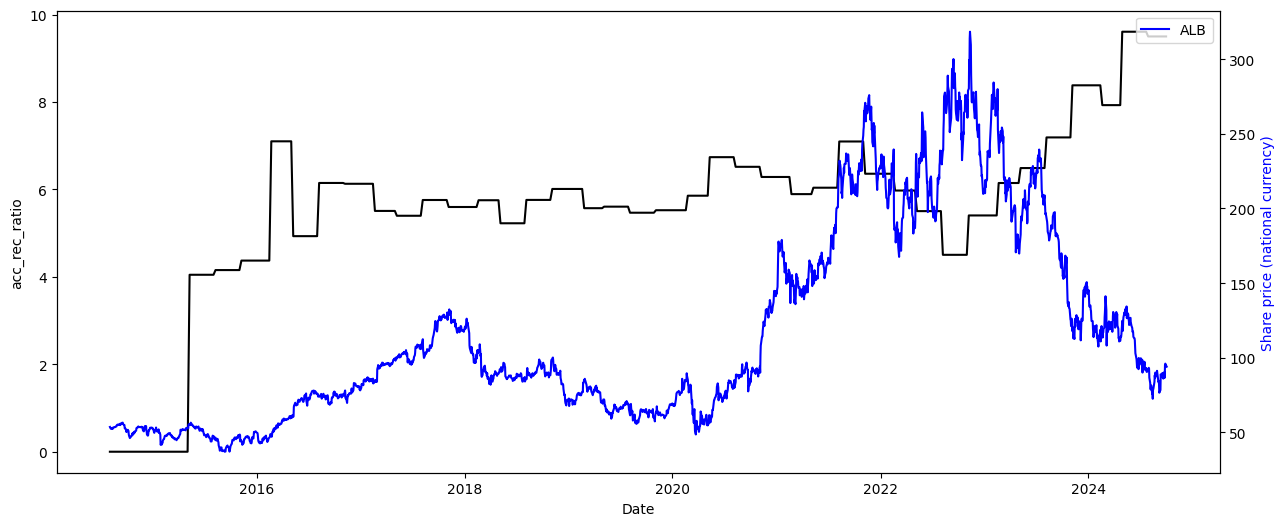

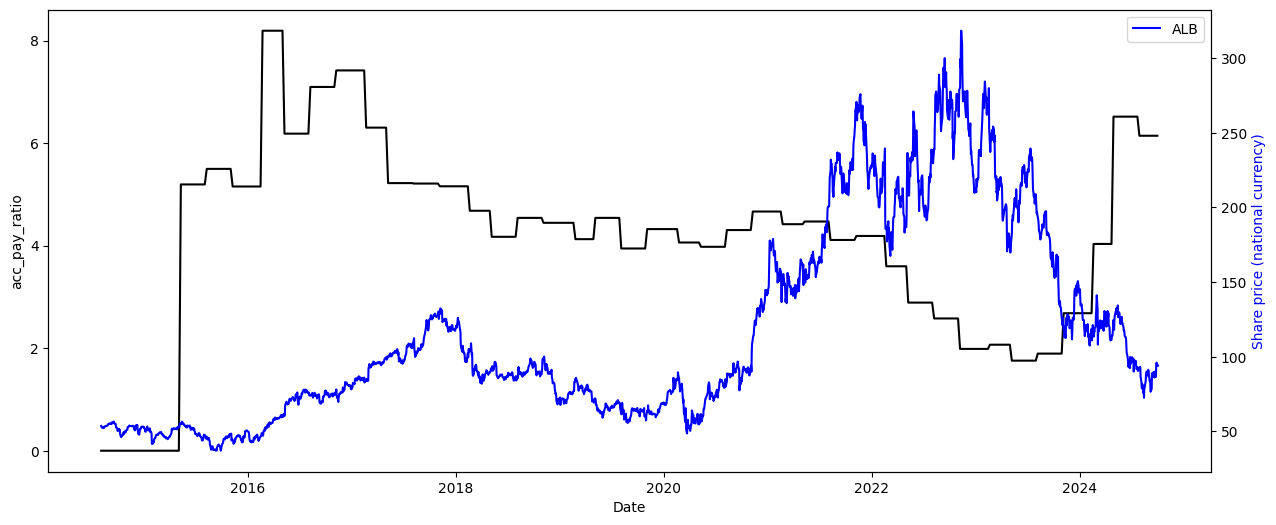

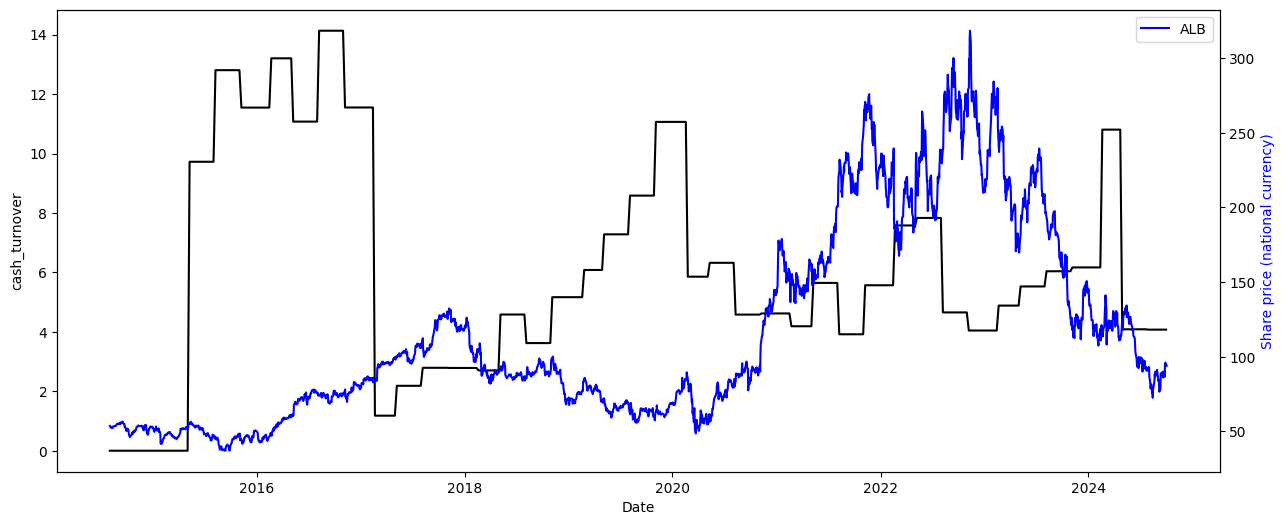

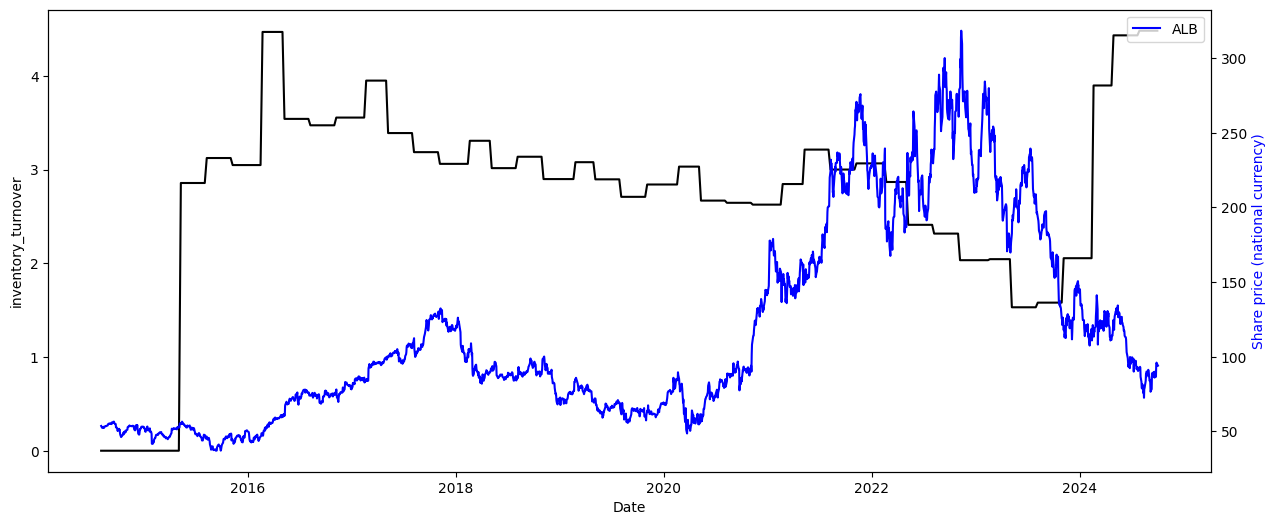

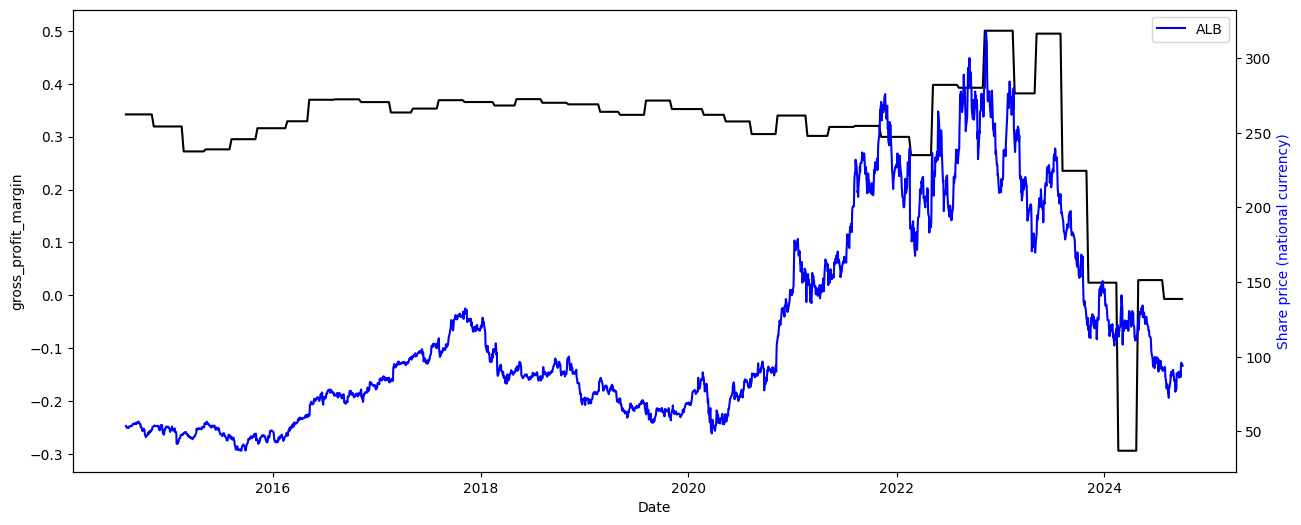

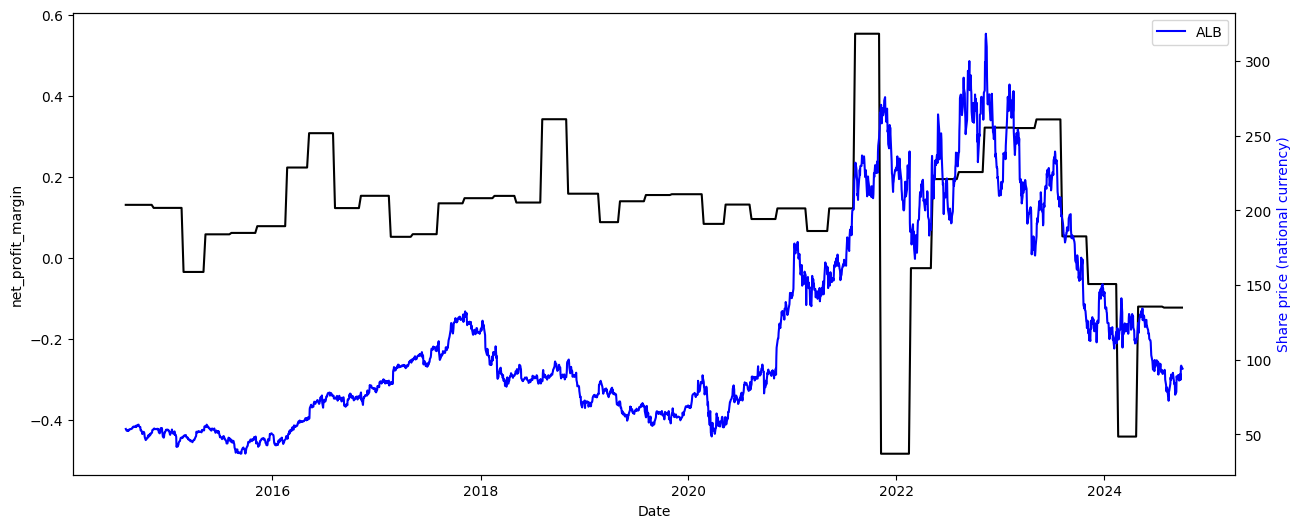

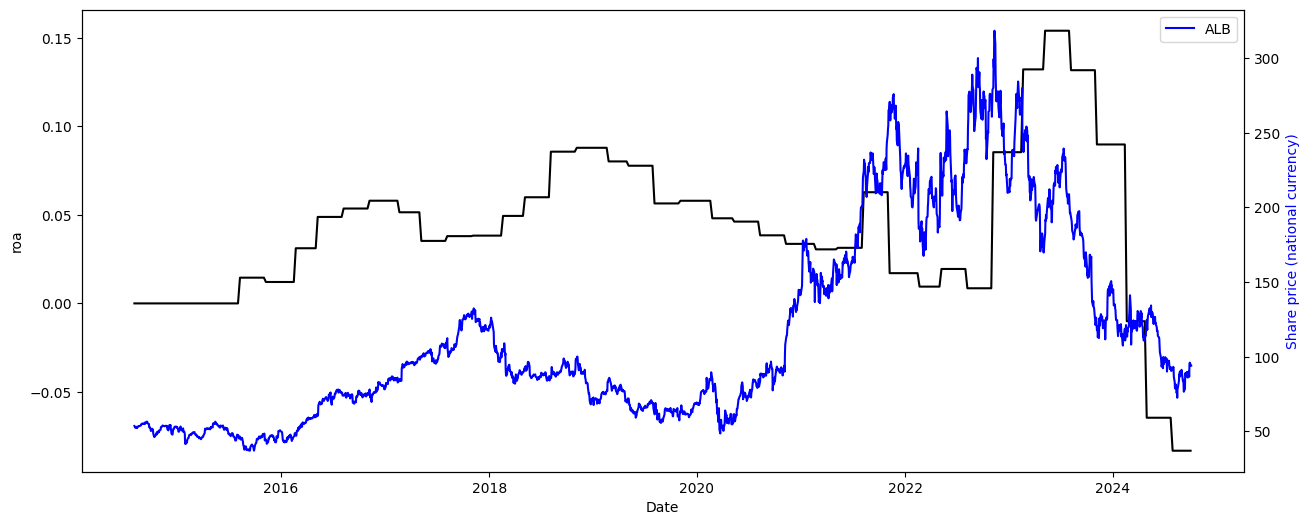

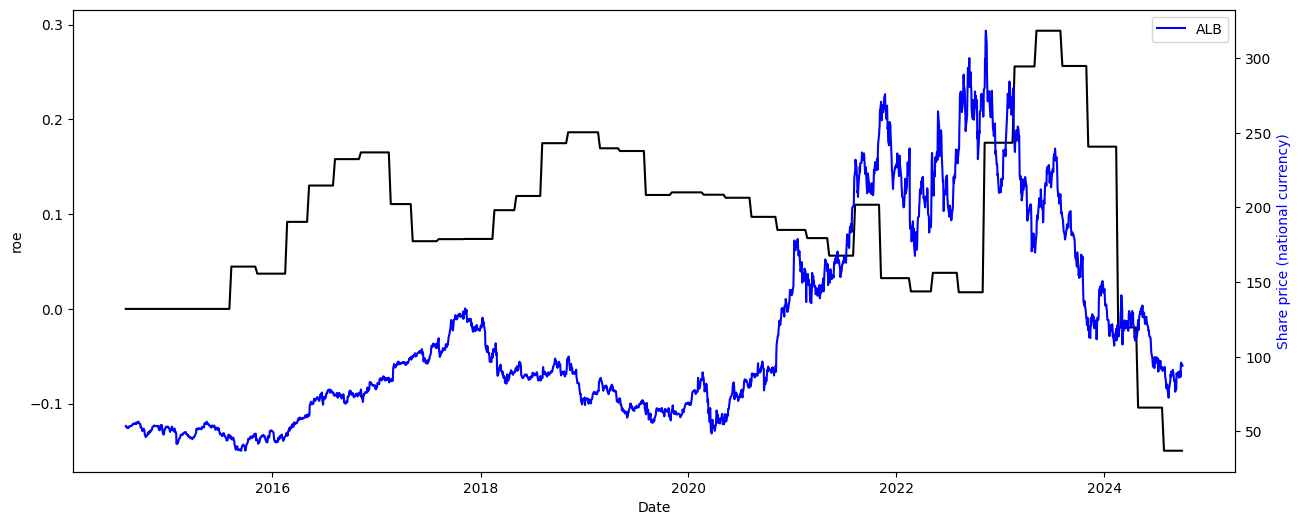

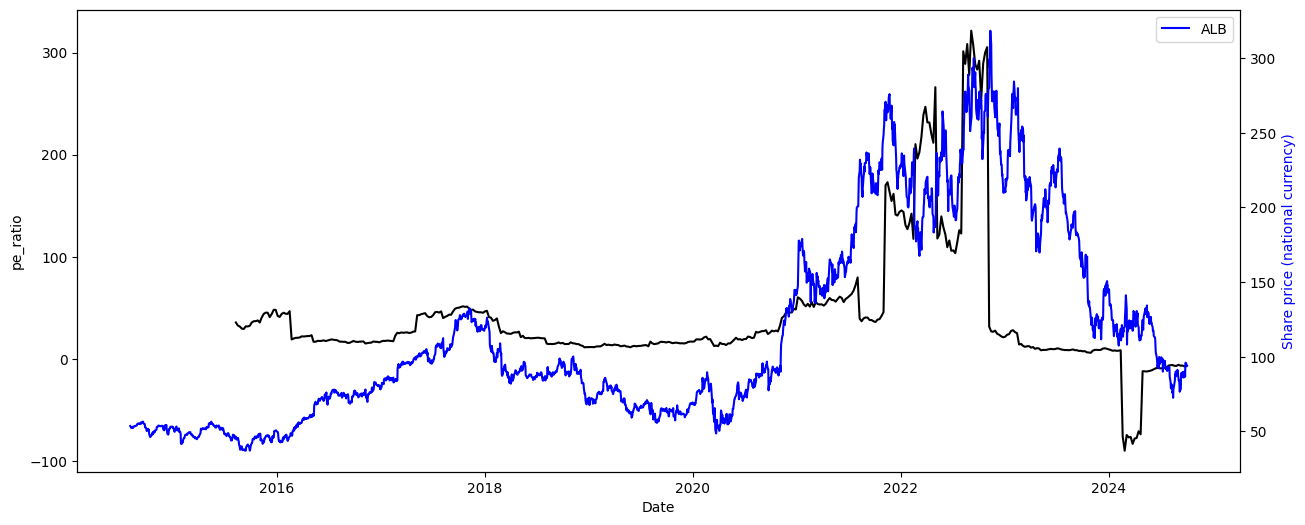

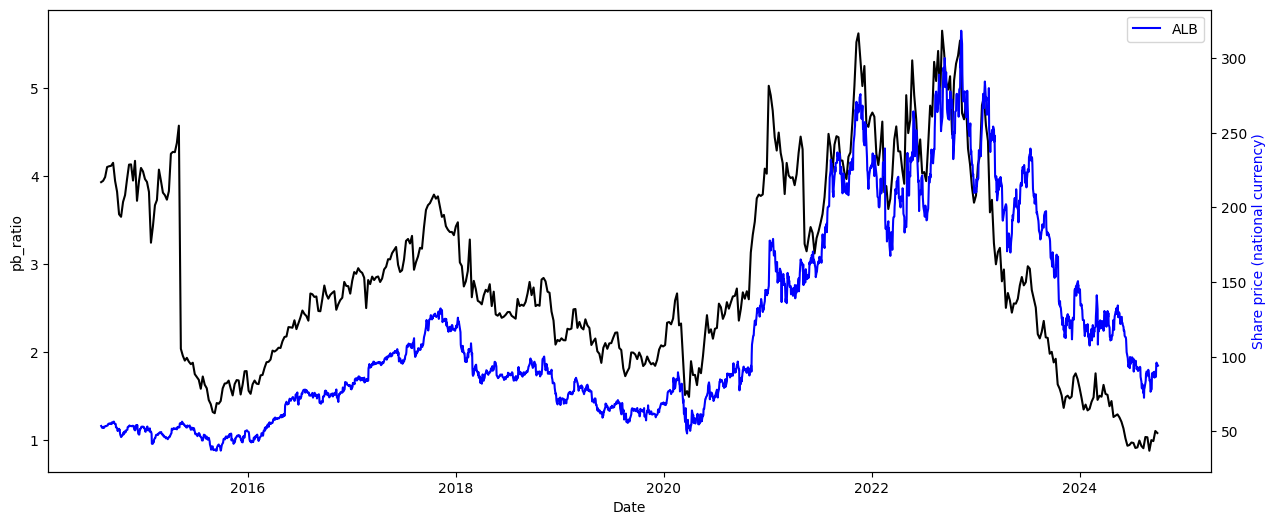

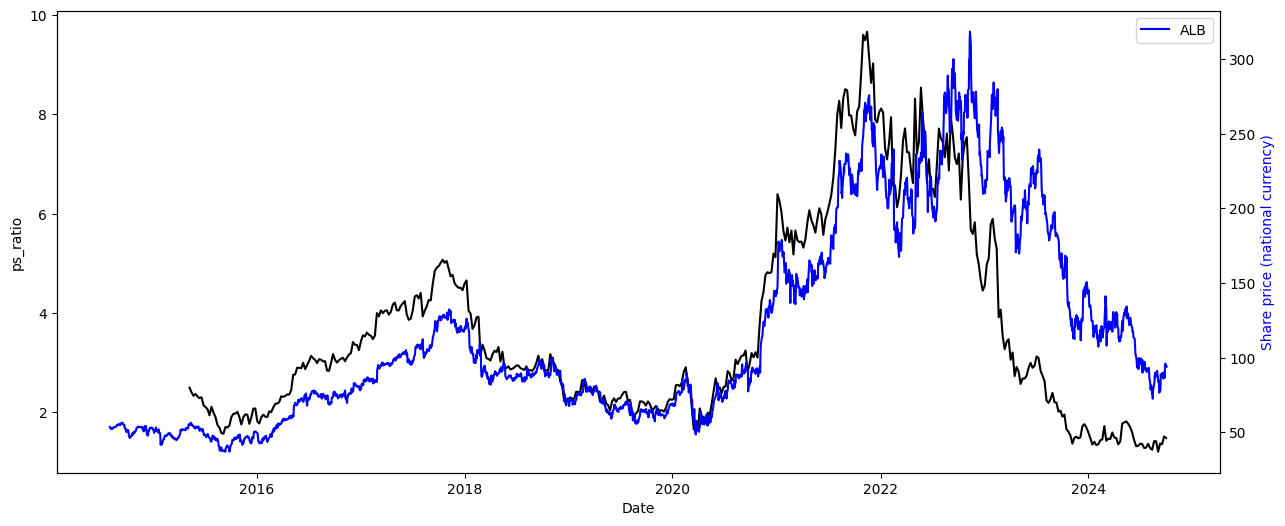

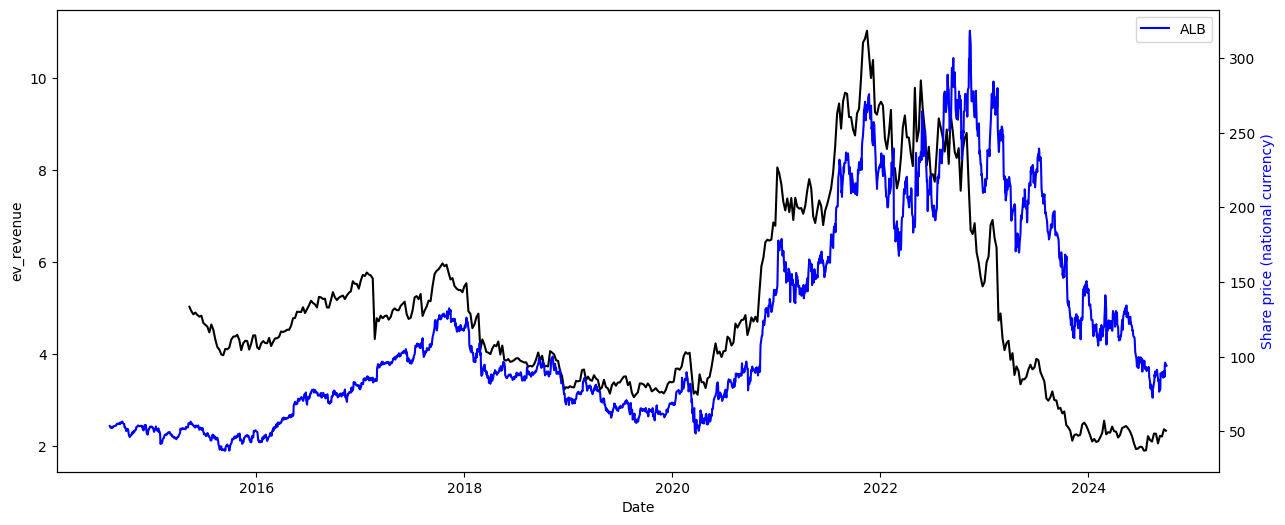

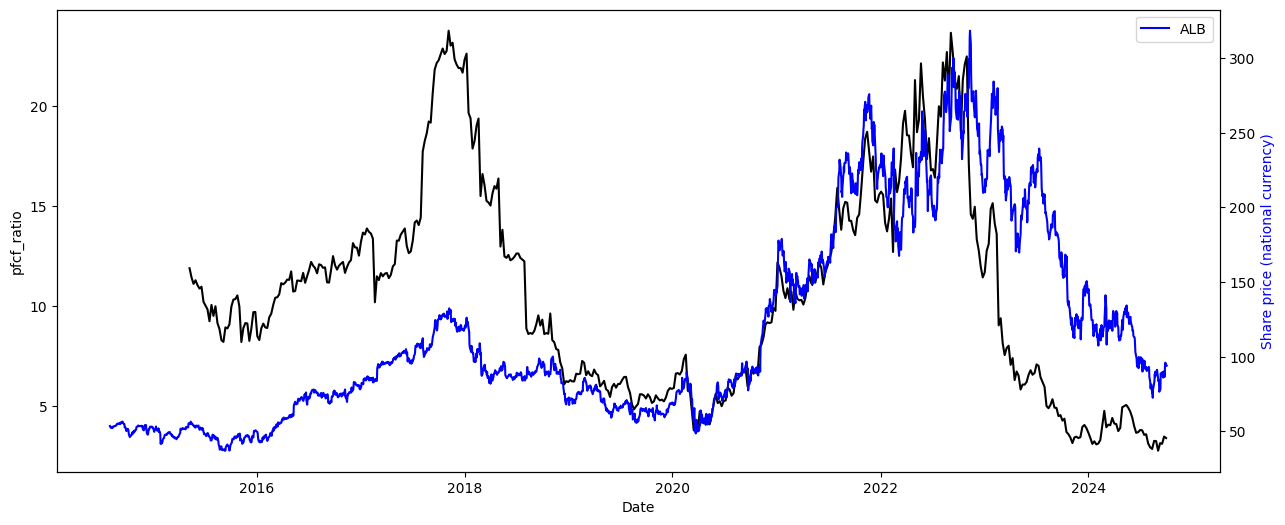

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

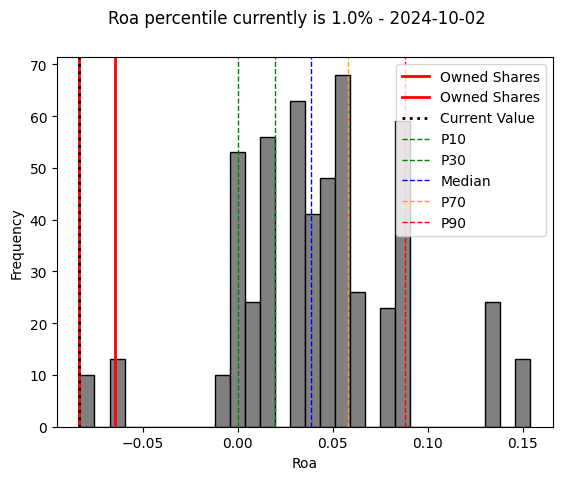

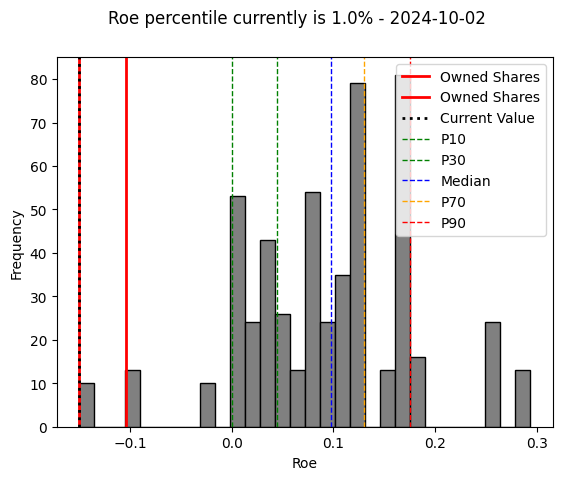

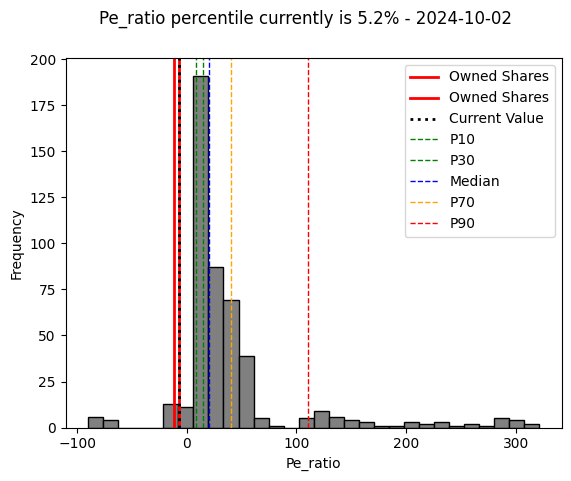

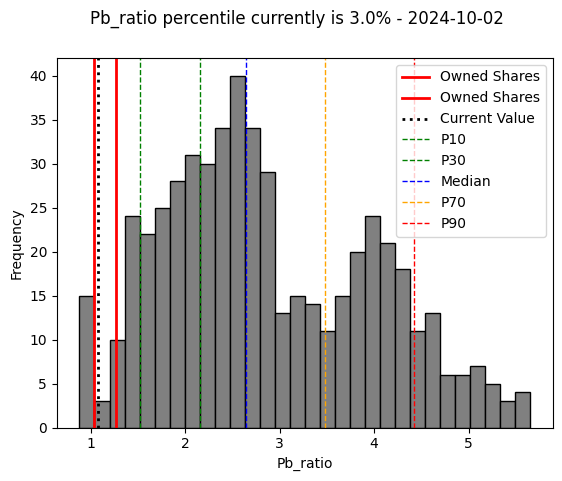

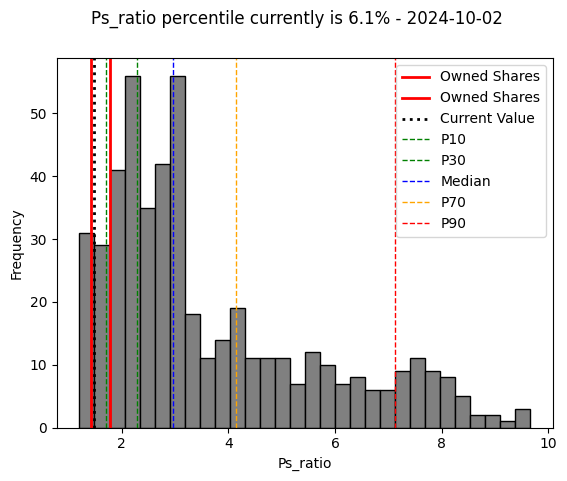

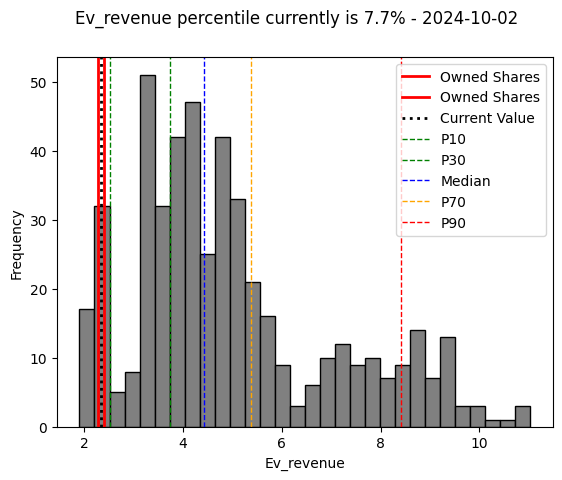

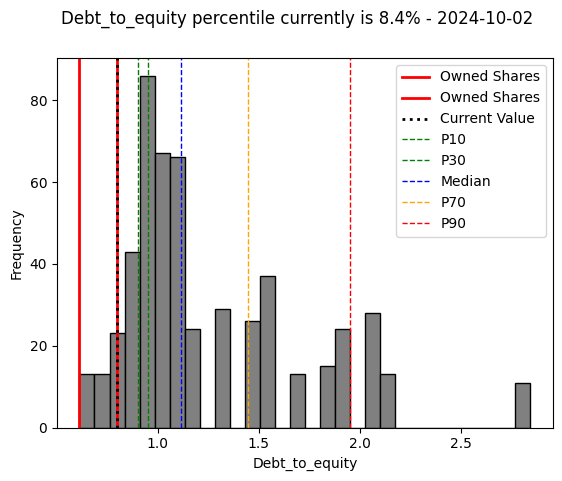

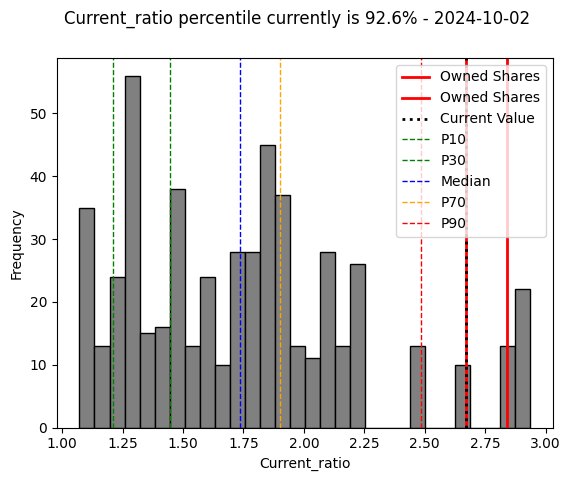

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.985635,-0.218858,-0.005445,-0.075933,-0.140600,-0.167964,-0.107682
roe,0.985635,1.000000,-0.265492,-0.059383,-0.137183,-0.175708,-0.084959,-0.155936
pe_ratio,-0.218858,-0.265492,1.000000,0.701303,0.722493,0.732617,-0.100662,-0.214726
pb_ratio,-0.005445,-0.059383,0.701303,1.000000,0.949049,0.909933,-0.124959,-0.025031
ps_ratio,-0.075933,-0.137183,0.722493,0.949049,1.000000,0.965751,-0.311511,-0.072916
ev_revenue,-0.140600,-0.175708,0.732617,0.909933,0.965751,1.000000,-0.064137,-0.250883
debt_to_equity,-0.167964,-0.084959,-0.100662,-0.124959,-0.311511,-0.064137,1.000000,-0.298003
current_ratio,-0.107682,-0.155936,-0.214726,-0.025031,-0.072916,-0.250883,-0.298003,1.000000


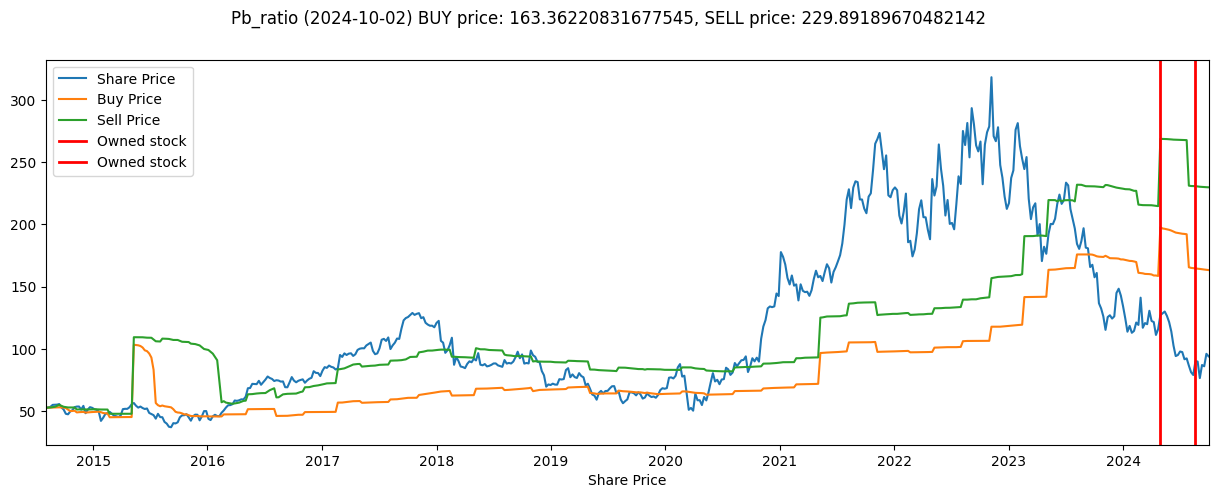

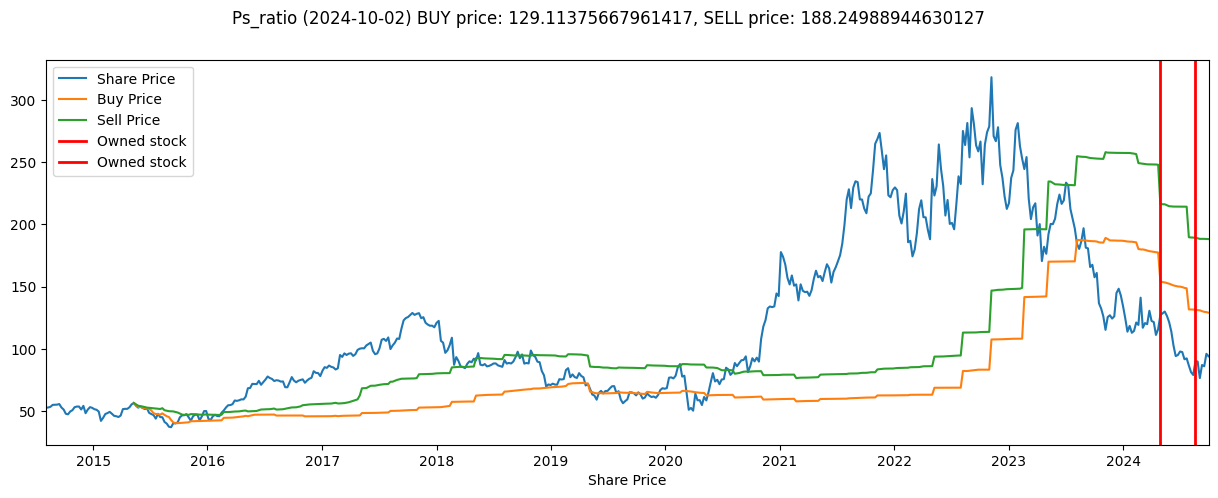

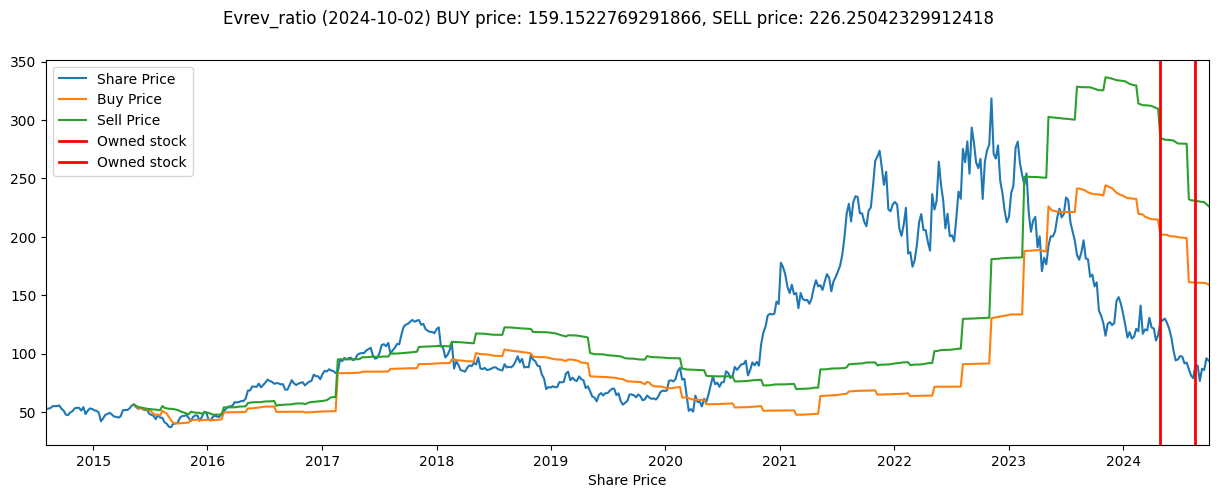

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)